# Activity trackers

For this assignment I will explore data from activity trackers obtained from a study in France. The participants wore a Fitbit Zip to collect their daily steps, distance and calories. 

### Import

In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import math
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

## Data cleaning

### Import data

In [2]:
df1 = pd.read_csv('steps.csv', sep=';')
df1.head()

,id,20-6-2013,21-6-2013,22-6-2013,23-6-2013,24-6-2013,25-6-2013,26-6-2013,27-6-2013,28-6-2013,...,4-5-2014,5-5-2014,6-5-2014,7-5-2014,8-5-2014,9-5-2014,10-5-2014,11-5-2014,12-5-2014,13-5-2014
0,1,NaN,NaN,NaN,NaN,3941.0,15733.0,9929.0,12879.0,10541.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,NaN,NaN,10473.0,705.0,4287.0,5507.0,4024.0,3926.0,14595.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,NaN,11428.0,12523.0,2553.0,190.0,2164.0,8185.0,9630.0,8983.0,...,3914.0,4364.0,NaN,NaN,NaN,6227.0,4567.0,2567.0,1129.0,NaN
3,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df2 = pd.read_csv('survey.csv')
df2.head()

,id,city,gender,age,hh_size,education,education_1,height,weight
0,1,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0
1,2,Lille,Male,35-44,1,3,Bachelor,180.0,77.0
2,3,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0
3,4,Lyon,Male,<25,1,1,Bachelor,178.0,80.0
4,5,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0


### Merge data

In [4]:
df = pd.merge(df2, df1, on = 'id') #'id' is the common identifier
df.head()

,id,city,gender,age,hh_size,education,education_1,height,weight,20-6-2013,...,4-5-2014,5-5-2014,6-5-2014,7-5-2014,8-5-2014,9-5-2014,10-5-2014,11-5-2014,12-5-2014,13-5-2014
0,1,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,Lille,Male,35-44,1,3,Bachelor,180.0,77.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0,NaN,...,3914.0,4364.0,NaN,NaN,NaN,6227.0,4567.0,2567.0,1129.0,NaN
3,4,Lyon,Male,<25,1,1,Bachelor,178.0,80.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.info() #Get information on the variables

<class 'pandas.core.frame.DataFrame'>
Int64Index: 929 entries, 0 to 928
Columns: 337 entries, id to 13-5-2014
dtypes: float64(330), int64(3), object(4)
memory usage: 2.4+ MB


In [6]:
df['weight'].value_counts().sort_index() #Get all the values. This may be less useful when there are many values.

6.0      1
20.0     1
37.0     1
45.0     9
46.0     3
        ..
133.0    3
140.0    5
149.0    1
155.0    2
700.0    1
Name: weight, Length: 72, dtype: int64

### Remove impossible values

In [7]:
df[(df["weight"] < 30) | (df["weight"] > 200)]

,id,city,gender,age,hh_size,education,education_1,height,weight,20-6-2013,...,4-5-2014,5-5-2014,6-5-2014,7-5-2014,8-5-2014,9-5-2014,10-5-2014,11-5-2014,12-5-2014,13-5-2014
43,44,Lille,Female,35-44,4,4,Master or doctorate,156.0,700.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
389,390,Lille,Female,25-34,3,4,Vocational,156.0,6.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
840,841,Lille,Female,35-44,3,4,High school,158.0,20.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df = df.drop(df[(df["weight"] < 30) | (df["weight"] > 200)].index)

Children under 30 kg probably won't walk/participate just like people over 200 kg. 
The weight outside of this range will be seen as an error so I decided to delete them.

In [9]:
df.iloc[:, 10:]

,21-6-2013,22-6-2013,23-6-2013,24-6-2013,25-6-2013,26-6-2013,27-6-2013,28-6-2013,29-6-2013,30-6-2013,...,4-5-2014,5-5-2014,6-5-2014,7-5-2014,8-5-2014,9-5-2014,10-5-2014,11-5-2014,12-5-2014,13-5-2014
0,NaN,NaN,NaN,3941.0,15733.0,9929.0,12879.0,10541.0,15773.0,2795.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,10473.0,705.0,4287.0,5507.0,4024.0,3926.0,14595.0,2952.0,4839.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,11428.0,12523.0,2553.0,190.0,2164.0,8185.0,9630.0,8983.0,5700.0,3998.0,...,3914.0,4364.0,NaN,NaN,NaN,6227.0,4567.0,2567.0,1129.0,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
924,4571.0,10471.0,5899.0,15295.0,9178.0,9348.0,12229.0,13767.0,NaN,9705.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
925,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
926,NaN,NaN,1623.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
927,NaN,14411.0,14364.0,26629.0,13092.0,9266.0,14949.0,43238.0,6.0,31592.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Create the variable mean steps per participant

In [10]:
df.iloc[:, 10:].mean(axis=1)

0      10205.521212
1       5687.423313
2       8301.729730
3       3633.200000
4       5312.129630
           ...     
924     6282.131868
925     4799.880000
926    10030.326829
927    15679.679012
928     7584.467153
Length: 926, dtype: float64

In [11]:
df['mean'] = df.iloc[:, 10:].mean(axis=1)

### Results dataframe

In [12]:
df.head()

,id,city,gender,age,hh_size,education,education_1,height,weight,20-6-2013,...,5-5-2014,6-5-2014,7-5-2014,8-5-2014,9-5-2014,10-5-2014,11-5-2014,12-5-2014,13-5-2014,mean
0,1,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10205.521212
1,2,Lille,Male,35-44,1,3,Bachelor,180.0,77.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5687.423313
2,3,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0,NaN,...,4364.0,NaN,NaN,NaN,6227.0,4567.0,2567.0,1129.0,NaN,8301.729730
3,4,Lyon,Male,<25,1,1,Bachelor,178.0,80.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3633.200000
4,5,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5312.129630


## Exploratory data analysis

## Histogram

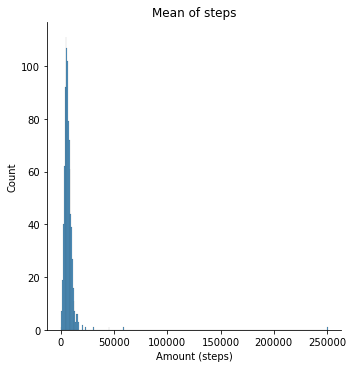

In [13]:
sns.displot(df['mean'].dropna(), kde=False) #Selecting the rating column. I need to drop the NA's for the plot
plt.title('Mean of steps')
plt.xlabel('Amount (steps)')
plt.show()

In order to have a better view on the distribution. I zoomed in/removed extremly high amount of steps. 
Why did I choose 100.000 steps? I think it is unlikely that the people in the sample have walked over 15 hours a day.. so that is why I removed outliers.

Resource:
https://blog.fitbit.com/100000-steps/

It's skewed a tiny bit to the right. But I would call it standard deviation.

In [14]:
def above_30000(x):
    if(x > 30000): 
        return float('NaN')
    else: 
        return x
df['mean'] = df['mean'].apply(above_30000)
df['mean'] = df['mean'].dropna()

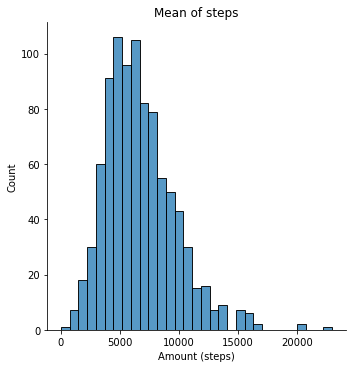

In [15]:
sns.displot(df['mean'].dropna(), kde=False)
plt.title('Mean of steps')
plt.xlabel('Amount (steps)')
plt.show()

## Summary statistics

In [16]:
df['mean'].describe()

count      918.000000
mean      6685.706601
std       2929.829999
min          4.000000
25%       4633.078051
50%       6236.363048
75%       8325.865217
max      22923.985612
Name: mean, dtype: float64

The median steps is: 6236.363047619048 amount
The mean steps is: 6685.706601038945 amount


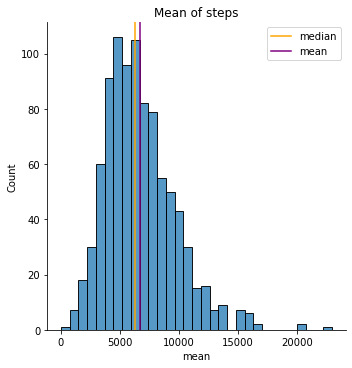

In [17]:
mean_of_mean = df['mean'].dropna()

mean_size = df['mean'].mean()
median_size = df['mean'].median()

print(f'The median steps is: {median_size} amount')
print(f'The mean steps is: {mean_size} amount')

sns.displot(mean_of_mean, kde=False)
plt.title('Mean of steps')
plt.axvline(median_size, 0, 100, color='orange', label='median')
plt.axvline(mean_size, 0, 100, color='purple', label='mean') 
plt.legend() 
plt.show()

## Verbal description of the distribution

For this distribution, I would say it is normal distribution with a slightly skew to the right.

## Graph of the relation
### Violin plot

The relation of the mean steps per participant and the age

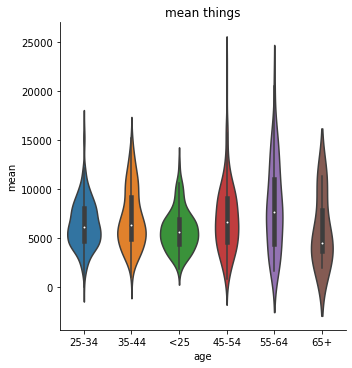

In [18]:
sns.catplot(x="age", y="mean", kind="violin", data=df)
plt.title('mean things')
plt.show()

From this beautiful violin plot you can see that people between the age of 45-64 do take more steps. Espessicaly compared to the <25 years olds, they don't even walk more than 15k steps. However, this could mean that age has an impact on the amount of steps and should be considerd with prediciting the mean.

## Feature engineering
A variable that gives a better indication of a healthy weight than weight alone is comparing weight, lenght and age. This can be done by the body mass index. 
BMI = weight/(height^2)

Less than 18.5 = underweight
Between 18.5 and 24.9 = normal
Between 25 and 29.9 = overweight
Over 30 = obese

However, i'll do this later if I have time and like coding again.

## Exploratory data analysis part 2


### scatterplot matrix of the numerical variables

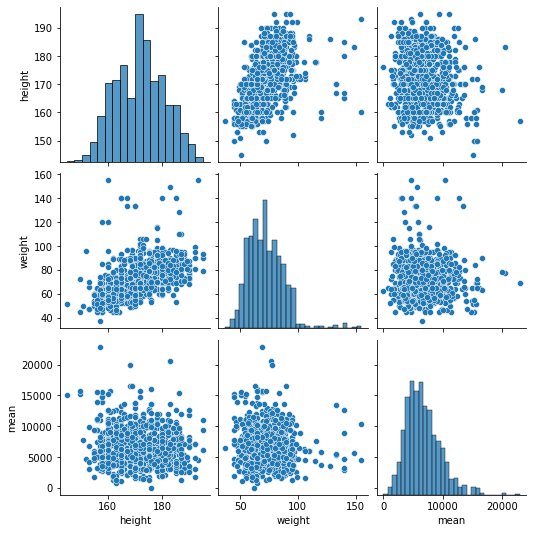

In [19]:
df_selection = df[['height', 'weight', 'mean']] 
sns.pairplot(df_selection)
plt.show()

### correlation matrix of the numerical variables

In [20]:
corr = df[['height', 'weight', 'mean']].corr()
corr

,height,weight,mean
height,1.000000,0.510058,-0.076525
weight,0.510058,1.000000,-0.062513
mean,-0.076525,-0.062513,1.000000


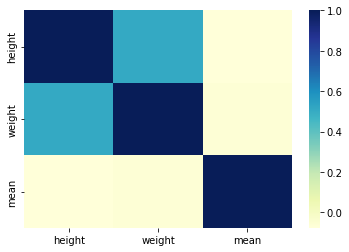

In [21]:
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap="YlGnBu") #the last two arguments set the column names
plt.show()

### Describe and interpret the results

The aqua blue in the heatmap shows there is a correlation of (0.51) which is a pretty decent between the weight and height. However the correlation between de mean and height or the mean and weight is not existing with a mean of -0.07


## Predictive model

A linear regression shows the relation between two variables (dependent and independent) in a linear approach. This means based on this you can predict other outcomes.

## Dummy variables for the categorical variables

For the catgorical variables, I included dummy variables that indicate the gender (Female) of the participant with 0's and 1's and age (in 6 columns).

In [22]:
dummy = pd.get_dummies(df["gender"])
dummy_age = pd.get_dummies(df["age"])
df = pd.concat([df, dummy["Female"], dummy_age], axis=1)

df = df[df['mean'].notna()]
df = df[df['weight'].notna()]
df = df[df['height'].notna()]

df.head()

,id,city,gender,age,hh_size,education,education_1,height,weight,20-6-2013,...,12-5-2014,13-5-2014,mean,Female,25-34,35-44,45-54,55-64,65+,<25
0,1,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0,NaN,...,NaN,NaN,10205.521212,0,1,0,0,0,0,0
1,2,Lille,Male,35-44,1,3,Bachelor,180.0,77.0,NaN,...,NaN,NaN,5687.423313,0,0,1,0,0,0,0
2,3,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0,NaN,...,1129.0,NaN,8301.729730,0,1,0,0,0,0,0
3,4,Lyon,Male,<25,1,1,Bachelor,178.0,80.0,NaN,...,NaN,NaN,3633.200000,0,0,0,0,0,0,1
4,5,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0,NaN,...,NaN,NaN,5312.129630,1,1,0,0,0,0,0


## Linear regression model

In [23]:
from sklearn.linear_model import LinearRegression 

X = df[['height', 'weight', '25-34', '35-44', '45-54', '55-64', '65+', '<25', 'Female']]
y = df['mean']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) #split the data, store it into different variables
X_train.head() #The train data

lm = LinearRegression() 
lm.fit(X_train, y_train) 

b0 = lm.intercept_ 
b1 = lm.coef_[0] 

print(f"The regression line is equal to y = {b0:.2f} + {b1:.2f}X") #.0f formats to 2 decimals.

The regression line is equal to y = 9289.12 + -9.25X


$y = 9289.12 + -9.25X$

In [24]:
y_test_p = lm.predict(X_test) #use built-in predict() method to generate predictions; store in original dataframe

## Evaluating model

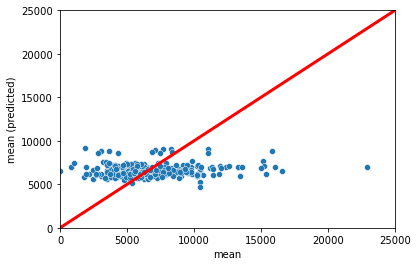

In [25]:
sns.scatterplot(x=y_test,y=y_test_p)
plt.xlim(0, 25000) #This sets the x-axis limits to (0, 5e10 = 140000000000)
plt.ylim(0, 25000) #Ditto for y-axis. I want both axes to have the same length, so we can compare them
plt.plot([0, 25000], [0, 25000], color='red', lw=3) #This draws the straight red line, you can leave this out if you wish
plt.xlabel('mean')
plt.ylabel('mean (predicted)')
plt.show()

In [26]:
r2_score(y_test, y_test_p)

-0.006005784438720463

In [27]:
math.sqrt(mean_squared_error(y_test, y_test_p)) #this gives the model fit (R2) for the Y and predicted Y

3052.1766271888932

# Conclusion

Based on the R^2, We can predict -0.6% of the variation in the predicted based on mean. Our typical prediction is off by 3052 steps. As we can see the dots are more horizontal compare to the red liniar line. This could mean that predicted mean is not accurate and this method should not be used.